# The fields of economists on DBpedia

In [58]:
from SPARQLWrapper import SPARQLWrapper, SPARQLWrapper2, JSON, TURTLE, XML, RDFXML
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
import pprint
import sparql_dataframe
import csv
# from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np 
import scipy.stats
import pandas as pd
from collections import Counter
from operator import itemgetter
import urllib.request
import json

from statsmodels.graphics.mosaicplot import mosaic

# Get economists with name, field and birth date

In [187]:
query = """

PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX dbp: <http://dbpedia.org/property/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>

SELECT DISTINCT ?economist ?name ?dbpName ?field (year(xsd:dateTime(?Birth_Date)) AS ?Year)

WHERE { ?economist a dbo:Economist .
        ?economist dbp:birthDate ?Birth_Date .
        ?economist dbp:field ?field1 .
        OPTIONAL {?economist foaf:name ?name .}
        OPTIONAL {?economist dbp:name ?dbpName .}
  BIND(STRAFTER(STR(?field1),"http://dbpedia.org/resource/") AS ?field2)
  BIND(REPLACE(STR(?field2),"[_]"," ") AS ?field)

  FILTER (xsd:date (?Birth_Date) > "1800-01-01"^^xsd:date)
  FILTER (str(?field) != "")
}
ORDER BY ?Year
"""

In [192]:
sparql = SPARQLWrapper("https://dbpedia.org/sparql") # https://live.dbpedia.org/sparql

In [193]:
sparql.setQuery(query)
sparql.setReturnFormat(JSON)

In [194]:
rc = sparql.queryAndConvert()
type(rc)

dict

In [195]:
# Number of rows in the result
len(rc['results']['bindings'])

1251

In [196]:
# Inspect the first three rows
i = 0
for l in rc['results']['bindings']:
    if i < 3:
        print(l)
        i += 1

{'economist': {'type': 'uri', 'value': 'http://dbpedia.org/resource/Franz_Hermann_Schulze-Delitzsch'}, 'name': {'type': 'literal', 'xml:lang': 'en', 'value': 'Hermann Schulze-Delitzsch'}, 'dbpName': {'type': 'literal', 'xml:lang': 'en', 'value': 'Hermann Schulze-Delitzsch'}, 'field': {'type': 'literal', 'value': 'Microfinance'}, 'Year': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '1808'}}
{'economist': {'type': 'uri', 'value': 'http://dbpedia.org/resource/Franz_Hermann_Schulze-Delitzsch'}, 'name': {'type': 'literal', 'xml:lang': 'en', 'value': 'Hermann Schulze-Delitzsch'}, 'dbpName': {'type': 'literal', 'xml:lang': 'en', 'value': 'Hermann Schulze-Delitzsch'}, 'field': {'type': 'literal', 'value': 'Microeconomics'}, 'Year': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '1808'}}
{'economist': {'type': 'uri', 'value': 'http://dbpedia.org/resource/Hermann_Heinrich_Gossen'}, 'name': {'type': 'literal

In [197]:
# Extract the values from the first 'n' rows
n = 0
result = []
for l in rc['results']['bindings']:
    if n < 10000 : ## 5:
        uri = l['economist']['value']
        try: 
            name = l['name']['value']
        except Exception as e :
            print(e)
            try: 
                name = l['dbpName']['value']
            except Exception as e:
                print(e)
                name = ''
    result.append([uri, name, l['Year']['value'],l['field']['value']])
    n += 1

'name'
'dbpName'
'name'
'dbpName'
'name'
'dbpName'
'name'
'dbpName'
'name'
'dbpName'
'name'
'dbpName'
'name'
'dbpName'
'name'
'dbpName'
'name'
'dbpName'
'name'
'dbpName'
'name'
'dbpName'
'name'
'dbpName'
'name'
'dbpName'
'name'
'dbpName'
'name'
'dbpName'
'name'
'dbpName'
'name'
'dbpName'
'name'
'dbpName'
'name'
'name'
'dbpName'
'name'
'dbpName'
'name'
'dbpName'
'name'
'dbpName'
'name'
'dbpName'
'name'
'dbpName'
'name'
'dbpName'


In [198]:
print(len(result))
result[:2]

1251


[['http://dbpedia.org/resource/Franz_Hermann_Schulze-Delitzsch',
  'Hermann Schulze-Delitzsch',
  '1808',
  'Microfinance'],
 ['http://dbpedia.org/resource/Franz_Hermann_Schulze-Delitzsch',
  'Hermann Schulze-Delitzsch',
  '1808',
  'Microeconomics']]

In [199]:
df = pd.DataFrame(result, columns=['uri', 'name', 'year', 'field'])
df.head()

,uri,name,year,field
0,http://dbpedia.org/resource/Franz_Hermann_Schu...,Hermann Schulze-Delitzsch,1808,Microfinance
1,http://dbpedia.org/resource/Franz_Hermann_Schu...,Hermann Schulze-Delitzsch,1808,Microeconomics
2,http://dbpedia.org/resource/Hermann_Heinrich_G...,Hermann Heinrich Gossen,1810,Microeconomics
3,http://dbpedia.org/resource/Lorenz_von_Stein,Lorenz von Stein,1815,Political economy
4,http://dbpedia.org/resource/Wilhelm_Georg_Frie...,,1817,Economics


In [200]:
df.loc[df['name'] == '']

,uri,name,year,field
4,http://dbpedia.org/resource/Wilhelm_Georg_Frie...,,1817,Economics
13,http://dbpedia.org/resource/Gustav_von_Schmoller,,1838,Economics
17,http://dbpedia.org/resource/Theodor_Hertzka,,1845,Monetary economics
19,http://dbpedia.org/resource/Charles_Gide,,1847,History of economic thought
28,http://dbpedia.org/resource/Thorstein_Veblen,,1857,Socioeconomics
...,...,...,...,...
1076,http://dbpedia.org/resource/Luigi_Zingales,,1963,Business economics
1116,http://dbpedia.org/resource/Hilde_C._Bjørnland,,1966,International economics
1166,http://dbpedia.org/resource/John_A._List,,1968,Economics
1185,http://dbpedia.org/resource/Ingrid_Woolard,,1970,Public economics


In [201]:
try:
    df_cf = df.groupby(['uri'])['field'].count() 
except Exception as e:
    print(e)
print(len(df_cf))    
df_cf[-5:]

711


uri
http://dbpedia.org/resource/Yung-Ping_Chen         2
http://dbpedia.org/resource/Ziya_Onis              1
http://dbpedia.org/resource/Zu'bi_M.F._Al-Zu'bi    1
http://dbpedia.org/resource/Zvi_Griliches          1
http://dbpedia.org/resource/Üner_Kırdar            2
Name: field, dtype: int64

In [202]:
### Create a list of twenty years period, i.e. the list of the first year of each period
d_list = []
period = 20
d_start = int(min(df['year']))
d_end = int(max(df['year']))

while d_start < d_end:
    d_list.append(d_start)
    d_start = d_start + period
d_list    

[1808, 1828, 1848, 1868, 1888, 1908, 1928, 1948, 1968]

In [203]:
def get_period(year, years):

    y_int = int(year)
    i = 1
    result = 0

    while i < len(years):
        y_begin = years[i-1]
        y_end = years[i]

        if y_int >= y_begin and y_int < y_end:
            result = years[i-1]
            
        i += 1    
    return result

In [204]:
get_period(1891, d_list)

1888

In [205]:
try: 
    df['periode'] = df.apply(lambda x : get_period(x['year'],d_list), axis=1)
except Exception as e:
    print(e)
df

,uri,name,year,field,periode
0,http://dbpedia.org/resource/Franz_Hermann_Schu...,Hermann Schulze-Delitzsch,1808,Microfinance,1808
1,http://dbpedia.org/resource/Franz_Hermann_Schu...,Hermann Schulze-Delitzsch,1808,Microeconomics,1808
2,http://dbpedia.org/resource/Hermann_Heinrich_G...,Hermann Heinrich Gossen,1810,Microeconomics,1808
3,http://dbpedia.org/resource/Lorenz_von_Stein,Lorenz von Stein,1815,Political economy,1808
4,http://dbpedia.org/resource/Wilhelm_Georg_Frie...,,1817,Economics,1808
...,...,...,...,...,...
1246,http://dbpedia.org/resource/Parag_Pathak,Parag A. Pathak,1980,Game theory,0
1247,http://dbpedia.org/resource/Parag_Pathak,Parag A. Pathak,1980,Microeconomics,0
1248,http://dbpedia.org/resource/Benjamin_Moll,Benjamin Moll,1983,Macroeconomics,0
1249,http://dbpedia.org/resource/Julia_Cagé,Julia Cagé,1984,Economics,0


In [207]:
print(pd.crosstab(df["field"], df["periode"]))

periode                 0     1808  1828  1848  1868  1888  1908  1928  1948
field                                                                       
Abraham Lincoln            0     0     0     0     0     0     0     0     1
Accounting                 0     0     0     0     1     0     0     0     1
Activism                   0     0     0     0     0     0     0     0     1
Africa                     0     0     0     0     0     0     0     1     0
Agricultural economics     0     0     0     1     2     1     2     2     2
...                      ...   ...   ...   ...   ...   ...   ...   ...   ...
Urban economics            1     0     0     0     0     2     1     3     1
Urbanism                   0     0     0     0     1     0     0     0     0
Value theory               0     0     0     0     1     0     0     0     0
Voluntary sector           0     0     0     0     0     0     0     1     0
Welfare economics          0     0     0     0     1     0     0     4     1

In [54]:
df['years'] = df.groupby(['field'])['year'].transform(lambda x : ' '.join(x))
df['count'] = df.groupby(['field']).count() 
  
# drop duplicate data 
df = df.drop_duplicates()    
  
# show the dataframe 

df.head(10)

,field,year,years,count
0,Economics,1834,1834 1899 1910 1925 1930 1932 1941 1943 1944 1...,NaN
1,Marginalism,1834,1834,NaN
2,Political economics,1851,1851 1956,NaN
3,Social economics,1873,1873,NaN
4,Macroeconomics,1885,1885 1899 1925 1942 1948 1950 1956 1959 1961 1...,NaN
5,Economics,1899,1834 1899 1910 1925 1930 1932 1941 1943 1944 1...,NaN
6,Ethics,1899,1899,NaN
7,Macroeconomics,1899,1885 1899 1925 1942 1948 1950 1956 1959 1961 1...,NaN
8,Development economics,1901,1901 1928 1943 1970 1971,NaN
9,Urban economics,1906,1906,NaN


/Users/fberetta/miniconda3/envs/py37_hn_sparql/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


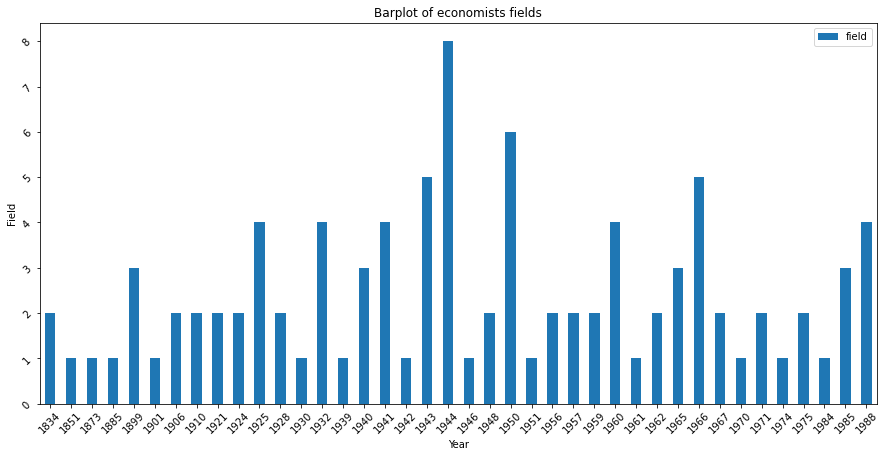

In [32]:
df1= (df.groupby(by=['year'])
.count()
.plot(kind="bar",figsize=(15,7)))
plt.ylabel('Field')
plt.xlabel('Year')
plt.title('Barplot of economists fields')
# plt.gcf().set_size_inches(50, 30)
plt.xticks(rotation=45)

p1 = plt.figure(1, [50,10])
ax = p1.add_subplot(111)
# Set the x-axis limit
# ax.set_xlim(-1,150)
# ax.set_ylim(-1,30)
# Change of fontsize and angle of xticklabels
plt.setp(ax.get_xticklabels(), fontsize=10, rotation=45)
plt.setp(ax.get_yticklabels(), fontsize=10, rotation=45)
plt.show()

In [186]:
m = df.to_numpy()
m

array([['http://dbpedia.org/resource/Léon_Walras', 'Léon Walras', '1834',
        'Marginalism', 1834],
       ['http://dbpedia.org/resource/Léon_Walras', 'Léon Walras', '1834',
        'Economics', 1834],
       ['http://dbpedia.org/resource/Eugen_Böhm_von_Bawerk',
        'Eugen Böhm von Bawerk', '1851', 'Political economics', 1834],
       ['http://dbpedia.org/resource/François_Simiand',
        'François Simiand', '1873', 'Social economics', 1854],
       ['http://dbpedia.org/resource/Alexander_Rüstow',
        'Alexander Rüstow', '1885', 'Macroeconomics', 1874],
       ['http://dbpedia.org/resource/Wilhelm_Röpke', 'Wilhelm Röpke',
        '1899', 'Economics', 1894],
       ['http://dbpedia.org/resource/Wilhelm_Röpke', 'Wilhelm Röpke',
        '1899', 'Ethics', 1894],
       ['http://dbpedia.org/resource/Michał_Kalecki', 'Michał Kalecki',
        '1899', 'Macroeconomics', 1894],
       ['http://dbpedia.org/resource/Raúl_Prebisch', 'Raúl Prebisch',
        '1901', 'Development econo

In [62]:
Year = [l[1] for l in m]
field = [l[0] for l in m]

In [185]:
# Barplot of economists fields
eff = [l[1] for l in m]
objects = [l[0] for l in m]

p1 = plt.bar(eff, objects)

plt.ylabel('Headcount')
plt.xlabel('Field')
plt.title('Barplot of economists fields')
plt.gcf().set_size_inches(80, 40)
plt.xticks(rotation=45)

p1 = plt.figure(1, [50, 3])
ax = p1.add_subplot(111)
# Set the x-axis limit
# ax.set_xlim(-1,150)
# ax.set_ylim(-1,500)
# Change of fontsize and angle of xticklabels
plt.setp(ax.get_xticklabels(), fontsize=20, rotation=45)
plt.setp(ax.get_yticklabels(), fontsize=20, rotation=45)
plt.show()

NameError: name 'm' is not defined

In [15]:
grouped= df.groupby['Year', 'field'], as_index=False['name'].count()
grouped.columns= ['Year']
grouped

TypeError: 'bool' object is not subscriptable